### esse é com todas as var lgb

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv',sep=',')

In [4]:
#balanceamento da base
train.Churn.sum()/train.shape[0]  #está bom o balanceamento. até 10, 15% ta bom

0.2653532126375577

In [5]:
test = pd.read_csv('test.csv', sep=',')

### Juntar train e test pq as mudanças que vou fazer tem que ser nas duas pra depois rodar na base test tmbm

In [6]:
#para juntar treino e teste tem que ter mesmas colunas 
test['Churn'] = 9999
test['test'] = 1
train['test'] = 0

In [7]:
test.shape

(1409, 22)

In [8]:
test.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,9999,1
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,NaN,99.00,5969.3,9999,1
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,9999,1
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,9999,1
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,9999,1


In [9]:
train.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,0


In [10]:
#unindo treino e teste
frames = [train, test]

df = pd.concat(frames, ignore_index=True)

In [11]:
df

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4897,Male,0,No,NaN,24.0,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8,9999,1
7039,6940,Male,0,No,No,35.0,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3,9999,1
7040,804,Female,0,Yes,No,46.0,Yes,No,DSL,No,...,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.5,9999,1
7041,1143,Male,1,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,775.3,9999,1


In [12]:
df.shape

(7043, 22)

In [13]:
#verificando se uniu corretamente train e test
train.shape[0]+test.shape[0]

7043

In [14]:
test['Contract'].value_counts() #se fosse mes a mes poderia trocar por var ordinal

Month-to-month    791
Two year          337
One year          281
Name: Contract, dtype: int64

In [15]:
#colunas que são objects
test.dtypes[test.dtypes=='object'].index

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [16]:
#nao susbstitui pq tem um espaço vazio que é string
#pd.to_numeric(df['TotalCharges']) 
df.TotalCharges.sort_values()

6931          
6697          
5947          
2145          
161           
         ...  
279     997.75
6994     998.1
2856    999.45
1880     999.8
6464     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [17]:

df.loc[df['TotalCharges'] == ' ','TotalCharges'] = 0

In [18]:
#usar a var total charges. mudando de object para float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [19]:
df.shape

(7043, 22)

### plotar boxplot em variaveis continuas e se tiver mto outlier da pra trocar por mediana

In [20]:
df.dtypes

id                    int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
test                  int64
dtype: object

In [21]:
quali = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

quanti = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
df.isnull().sum()

id                    0
gender                0
SeniorCitizen         0
Partner               0
Dependents          259
tenure              579
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod       129
MonthlyCharges        0
TotalCharges          0
Churn                 0
test                  0
dtype: int64

In [23]:
df.nunique()

id                  7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  3
test                   2
dtype: int64

### Resolvendo os valores nulos

In [24]:
#resolvendo os nulos
#trocar por na
#dependetes era sim e não
df['Dependents'] = df['Dependents'].fillna('NA') 

In [25]:
df['Dependents'].value_counts()

No     4746
Yes    2038
NA      259
Name: Dependents, dtype: int64

### verificando se a dist é normal para tratar os nulos da var TENURE

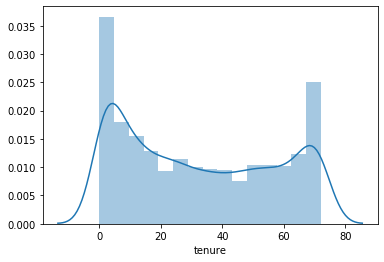

In [26]:
#distribuição de tenure não é dist normal
sns.distplot(df.tenure[df.tenure.notnull()]);

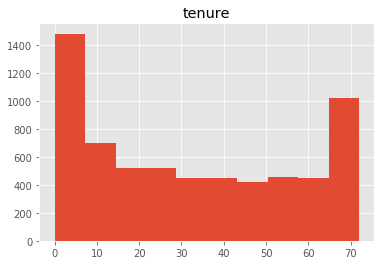

In [27]:
plt.style.use('ggplot')
df.hist('tenure')
plt.show()

#não tem dist normal

#acima vemos que não tem dist normal

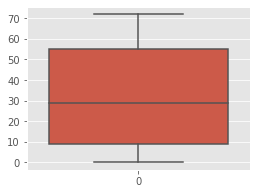

In [28]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.boxplot(data=df.tenure, ax=ax);

#aqui vemos que nao tem outlier
#se tiver mto outlier, melhor usar mediana e nao média
#se a média nao é boa medida, o desvio padrão tmbm nao vai ser pq ele é baseado na média
#box plot --> amplitude interquartil
#o corte no meio é a mediana
# os outliers são os que passam os limites inf e sup

#nesse cao média e mediana estao bem proximas, tanto faz por qual substituir



In [29]:
#tenure são numeros. substitui nulos pela média
#ver a distribuição disso se é normal. se média ta centralizada. dependendo da quantidade de nulos, vale a pena substituir por media ou mediana
# se for pouco nulo a proba de ser a média é alta
df['tenure'] = df['tenure'].fillna(32) 

In [30]:
#payment method é string
#trocar o faltante por electronic check pq é bem pouco. se fosse mais dava pra criar categoria faltante

df['PaymentMethod'] = df['PaymentMethod'].fillna('Electronic check') 

In [31]:
df['PaymentMethod'].value_counts()

Electronic check             2446
Mailed check                 1585
Bank transfer (automatic)    1519
Credit card (automatic)      1493
Name: PaymentMethod, dtype: int64

In [32]:
df.isnull().sum() #nulos resolvidos

id                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
test                0
dtype: int64

In [33]:
df.describe()
#boxplot de todas as var continuas pra substituir outliers
#da pra criar novas var a partir das que tem

,id,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,test
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,0.162147,32.328979,64.761692,2279.734304,2000.580151,0.200057
std,2033.283305,0.368612,23.507909,30.090047,2266.794470,4000.203711,0.400071
min,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,1761.500000,0.000000,10.000000,35.500000,398.550000,0.000000,0.000000
50%,3522.000000,0.000000,32.000000,70.350000,1394.550000,0.000000,0.000000
75%,5282.500000,0.000000,53.000000,89.850000,3786.600000,1.000000,0.000000
max,7043.000000,1.000000,72.000000,118.750000,8684.800000,9999.000000,1.000000


In [34]:
df['TotalCharges'].nunique()

6531

In [35]:
df.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,Electronic check,45.05,2560.10,0,0
1,6731,Male,0,Yes,Yes,32.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1,0


In [36]:
df.describe()

,id,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,test
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,0.162147,32.328979,64.761692,2279.734304,2000.580151,0.200057
std,2033.283305,0.368612,23.507909,30.090047,2266.794470,4000.203711,0.400071
min,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,1761.500000,0.000000,10.000000,35.500000,398.550000,0.000000,0.000000
50%,3522.000000,0.000000,32.000000,70.350000,1394.550000,0.000000,0.000000
75%,5282.500000,0.000000,53.000000,89.850000,3786.600000,1.000000,0.000000
max,7043.000000,1.000000,72.000000,118.750000,8684.800000,9999.000000,1.000000


### Box plots para substituir outliers caso necessário

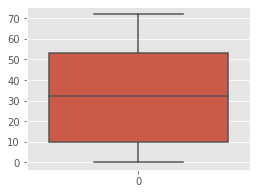

In [37]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.boxplot(data=df.tenure, ax=ax);



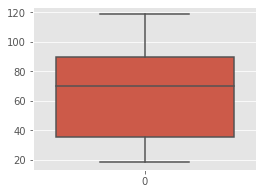

In [38]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(data=df.MonthlyCharges, ax=ax);


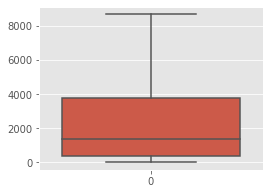

In [39]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(data=df.TotalCharges, ax=ax);


### Heat map pra ver relação entre variáveis

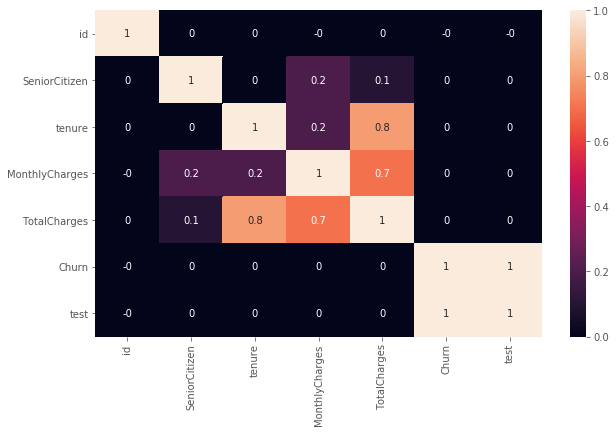

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 6))

vg_corr = df.corr().round(1)
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

### Dummyzar var categóricas

In [41]:
#one hot enconder = dummies
df_onehot = df[quali].copy()
df_onehot = pd.get_dummies(df_onehot, columns = quali , drop_first = True)
df_onehot

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,1,0,1,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,1,1,0,...,0,1,0,1,0,1,1,1,0,0
3,0,0,0,1,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
4,1,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7039,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
7040,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
7041,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0


In [42]:
df_onehot.dtypes

gender_Male                              uint8
SeniorCitizen_1                          uint8
Partner_Yes                              uint8
Dependents_No                            uint8
Dependents_Yes                           uint8
PhoneService_Yes                         uint8
MultipleLines_No phone service           uint8
MultipleLines_Yes                        uint8
InternetService_Fiber optic              uint8
InternetService_No                       uint8
OnlineSecurity_No internet service       uint8
OnlineSecurity_Yes                       uint8
OnlineBackup_No internet service         uint8
OnlineBackup_Yes                         uint8
DeviceProtection_No internet service     uint8
DeviceProtection_Yes                     uint8
TechSupport_No internet service          uint8
TechSupport_Yes                          uint8
StreamingTV_No internet service          uint8
StreamingTV_Yes                          uint8
StreamingMovies_No internet service      uint8
StreamingMovi

### Juntando categoricas na base de novo

In [43]:
df2 = pd.concat([df.drop(quali + ['id'], axis=1), df_onehot], axis=1)
df2.head()

,tenure,MonthlyCharges,TotalCharges,Churn,test,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,56.0,45.05,2560.10,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,32.0,19.65,332.65,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
2,60.0,110.80,6640.70,0,0,0,0,1,1,0,...,0,1,0,1,0,1,1,1,0,0
3,37.0,101.90,3545.35,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,29.0,70.75,1974.80,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


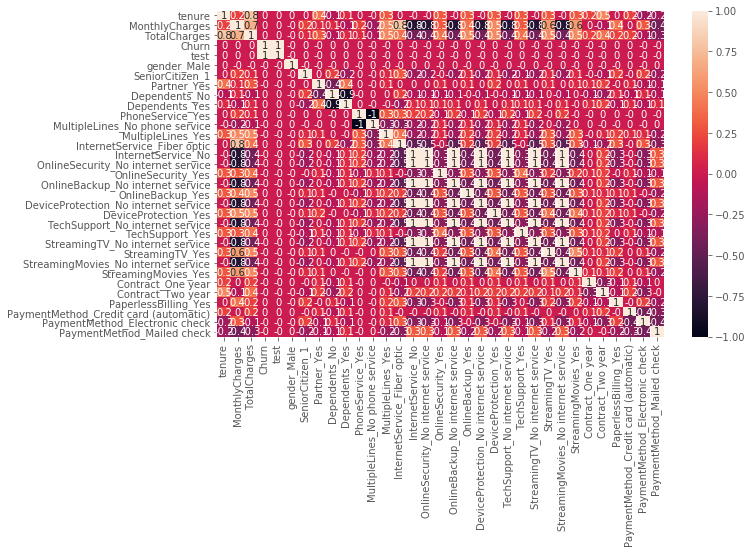

In [44]:
import seaborn as sns

plt.figure(figsize=(10, 6))

vg_corr = df2.corr().round(1)
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

### Train test split

In [45]:
#agora eu tenho uma base pronta pra modelar mas preciso tirar os dados que são do test 

In [46]:
#treino
newdf = df2[(df2.test == 0)]

In [47]:
#essa é a base que tem o teste (precisa enviar resposta disso pro desafio)
df_desafio = df2[(df2.test == 1)]

In [48]:
df_desafio.head()

,tenure,MonthlyCharges,TotalCharges,Churn,test,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5634,23.0,20.00,445.30,9999,1,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,0
5635,61.0,99.00,5969.30,9999,1,1,1,1,0,1,...,0,1,0,1,1,0,0,0,1,0
5636,36.0,84.75,3050.15,9999,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
5637,61.0,61.45,3751.15,9999,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,0
5638,47.0,20.55,945.70,9999,1,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,1


In [49]:
df_desafio.shape

(1409, 33)

In [50]:
df_desafio.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
test                                       int64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes

In [51]:
newdf.shape

(5634, 33)

In [52]:
newdf.head()

,tenure,MonthlyCharges,TotalCharges,Churn,test,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,56.0,45.05,2560.10,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,32.0,19.65,332.65,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
2,60.0,110.80,6640.70,0,0,0,0,1,1,0,...,0,1,0,1,0,1,1,1,0,0
3,37.0,101.90,3545.35,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,29.0,70.75,1974.80,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


In [53]:
newdf.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
test                                       int64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes

### TIREI test e churn

In [54]:
#tirei a taxa carga mes total pq tinha numeros infinitos e mtos outliers
X = newdf.drop(['Churn']+['test'], axis=1)
y = newdf['Churn']

In [55]:
X.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [56]:
y.dtypes

dtype('int64')

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [59]:
y_train.shape

(4507,)

In [60]:
X_train.shape

(4507, 31)

### Gradient Boost com todas as vars

In [63]:
X_train.isnull().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_No                            0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [64]:
y_train.isnull().sum()

0

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Acurácia do Grandient Boost

In [66]:
gb.score(X_test, y_test) #acurácia do modelo

0.8101153504880213

In [67]:
X_train.shape

(4507, 31)

### Logistic regression com todas as vars

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
LR = LogisticRegression(C = 1)

LR.fit(X_train,y_train)



C:\Users\amand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
LR.score(X_train, y_train) # Acuracia ((VP + VN) / TOTAL ) do modelo na base de dados


0.8087419569558465

In [71]:
X_train.shape

(4507, 31)

### Acurácia do Logistic Regression com todas as vars

In [72]:
#acurácia na teste

LR.score(X_test, y_test) 

0.7897071872227152

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, LR.predict(X_test))

array([[748,  91],
       [146, 142]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, LR.predict(X_test))

array([[748,  91],
       [146, 142]], dtype=int64)

In [75]:
y_test.sum()

288

In [76]:
152/(136+152)

0.5277777777777778

In [77]:
X_train.shape

(4507, 31)

### Random forest com todas as vars

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
model.score(X_test, y_test)

0.808340727595386

In [80]:
X_train.shape

(4507, 31)

### Feature importance

In [81]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



In [82]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 2 (0.144661)
2. feature 0 (0.138801)
3. feature 1 (0.118610)
4. feature 11 (0.047840)
5. feature 26 (0.041202)
6. feature 3 (0.039533)
7. feature 29 (0.038913)
8. feature 25 (0.033489)
9. feature 14 (0.033318)
10. feature 27 (0.031718)
11. feature 20 (0.030389)
12. feature 5 (0.029507)
13. feature 16 (0.027669)
14. feature 10 (0.025131)
15. feature 4 (0.024898)
16. feature 24 (0.024663)
17. feature 18 (0.024553)
18. feature 22 (0.024305)
19. feature 6 (0.018642)
20. feature 28 (0.018329)
21. feature 7 (0.016926)
22. feature 30 (0.015633)
23. feature 19 (0.009162)
24. feature 17 (0.007560)
25. feature 13 (0.005885)
26. feature 8 (0.005128)
27. feature 9 (0.005089)
28. feature 15 (0.005065)
29. feature 23 (0.004866)
30. feature 12 (0.004509)
31. feature 21 (0.004005)


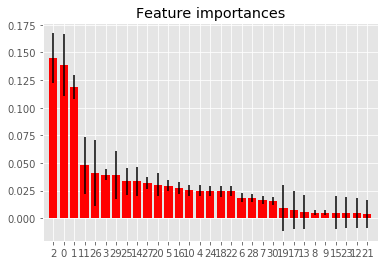

In [83]:
#Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [84]:
#!pip install xgboost

In [82]:

#Import de todos os possível modelos

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor

from sklearn.feature_selection import RFE

clf = XGBRegressor()
rfe = RFE(estimator=clf, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)
#melhores 15 features, coerente com os numeros de correlação.

In [77]:
#print('Best 15 Features of Train dataset : ', X_train.columns[rfe.support_])

features_15 = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check']

In [83]:
#instanciando os modelos
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
gradient_boost = GradientBoostingClassifier()


In [81]:
#instanciando os modelos
#random_forest = RandomForestRegressor(n_estimators=100, max_depth = 6)
#ada_boost = AdaBoostRegressor(n_estimators=200, learning_rate= 0.3)
#gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2)
#xgb_model = XGBRegressor(max_depth = 4, learning_rate = 0.1, n_estimators = 300, objective='reg:squarederror')

In [84]:

models = [random_forest, ada_boost, gradient_boost]
labels = [ 'Random Forest', 'AdaBoost', 'gradientBoost']

for label,model in zip(labels, models):
    model.fit(X_train, y_train)
    #print('{}: {}'.format(label, mean_squared_error(y_test, model.predict(X_test[features_15]))))
    #print('{}: {}'.format(label, r2_score(y_test, model.predict(X_test[features_15]))))
    print('{}: {}'.format(label, model.score(X_test, y_test)))

Random Forest: 0.8047914818101154
AdaBoost: 0.7941437444543035
gradientBoost: 0.8101153504880213


### entregar com ada boost com todas variaveis

In [85]:
df_desafio.dtypes #tem que tirar churn, test, taxa carga mes total 

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
test                                       int64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes

In [86]:
df_desafio.Churn.describe()

count    1409.0
mean     9999.0
std         0.0
min      9999.0
25%      9999.0
50%      9999.0
75%      9999.0
max      9999.0
Name: Churn, dtype: float64

In [87]:
#tirando variáveis 
df_desafio = df_desafio.drop(['Churn']+['test'], axis=1)

In [88]:
df_desafio.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [89]:
df_desafio.isnull().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_No                            0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [90]:
pred = ada_boost.predict(df_desafio)

In [91]:
pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [92]:
pred.shape

(1409,)

In [93]:
sub = pd.DataFrame({'id':test.id,'Churn':pred})

In [94]:
sub

,id,Churn
0,5027,0
1,1733,0
2,5384,1
3,6554,0
4,364,0
...,...,...
1404,4897,0
1405,6940,0
1406,804,0
1407,1143,1


In [95]:
# Criando arquivo de submissão

pd.DataFrame({'id':test.id,'Churn':pred}).to_csv("answer5.csv", index= False)

In [96]:
#balanceamento da base
sub.Churn.sum()/sub.shape[0] 

0.23491838183108588